# Seaborn

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting</a></span></li></ul></div>

## Introduction

This uses Matplotlib in the background, but the API is designed mainly for statistics and visualization of complex data. Exploring datasets is intended to be quick and simple using very terse commands compared with other plotting packages.

The `set()` function changes many of Matplotlib's defaults for the entire notebook.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

## Data

Seaborn documentation uses several standard datasets. This command lists their names, along with verbose warning messages:

In [7]:
# sns.get_dataset_names()

We will use the galaxies data, in a pandas dataframe with some calculated fields added. There is no need to split by specClass, Seaborn will do that on the fly. In fact, Seaborn's strength is anticipating your needs with a rich set of options and sensible defaults - kudos to the designers!

In [8]:
data = pd.read_pickle('sdss_colors.pkl')
data[:3]

,u,g,r,i,z,specClass,redshift,redshift_err,u-g,g-r,r-i,far
0,18.06726,17.92133,17.76799,17.83525,17.74435,QSO,0.946076,0.000269,0.14593,0.15334,-0.06726,True
1,19.46527,17.84728,17.00071,16.56581,16.20629,GALAXY,0.078311,0.000021,1.61799,0.84657,0.43490,False
2,18.65488,17.34237,16.79778,16.49659,16.24572,GALAXY,0.032940,0.000019,1.31251,0.54459,0.30119,False


## Plotting

A quick and basic plot:

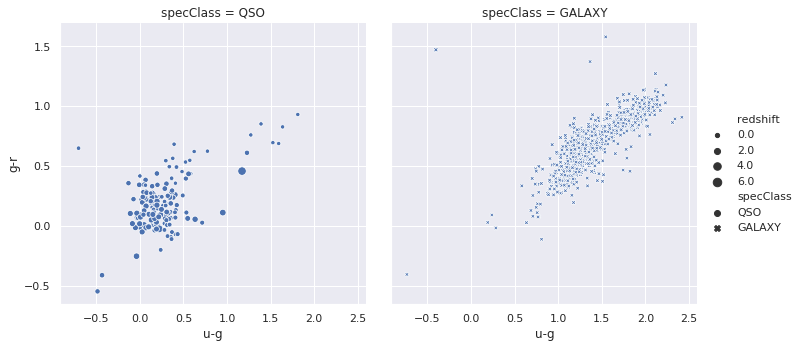

In [9]:
sns.relplot(x='u-g', y="g-r", 
            col="specClass", style="specClass", 
            size="redshift", 
            data=data);

Add a regression line with 95% confidence intervals. This is just a linear fit, but `lmplot()` also works with higher order polynomials, logistic regression and a variety of specialized fits.

/home/colin/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


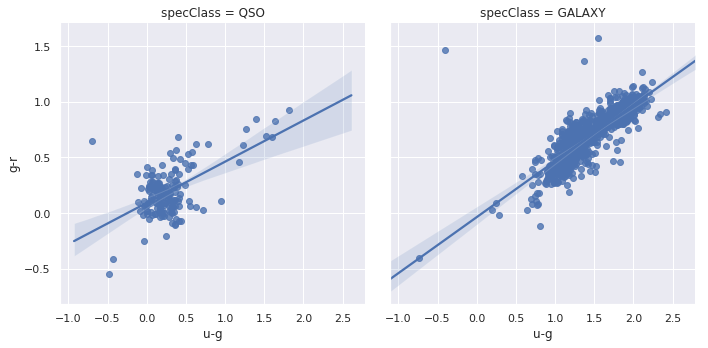

In [10]:
sns.lmplot(x='u-g', y="g-r", col="specClass", data=data);

Plot everything against everything, to get a quick feel for relations. Seaborn will choose an appropriate plot type in each case - only scatter and line plots here; categorical fields can appear as histograms.

Perhaps cutting down the number of columns would be sensible!

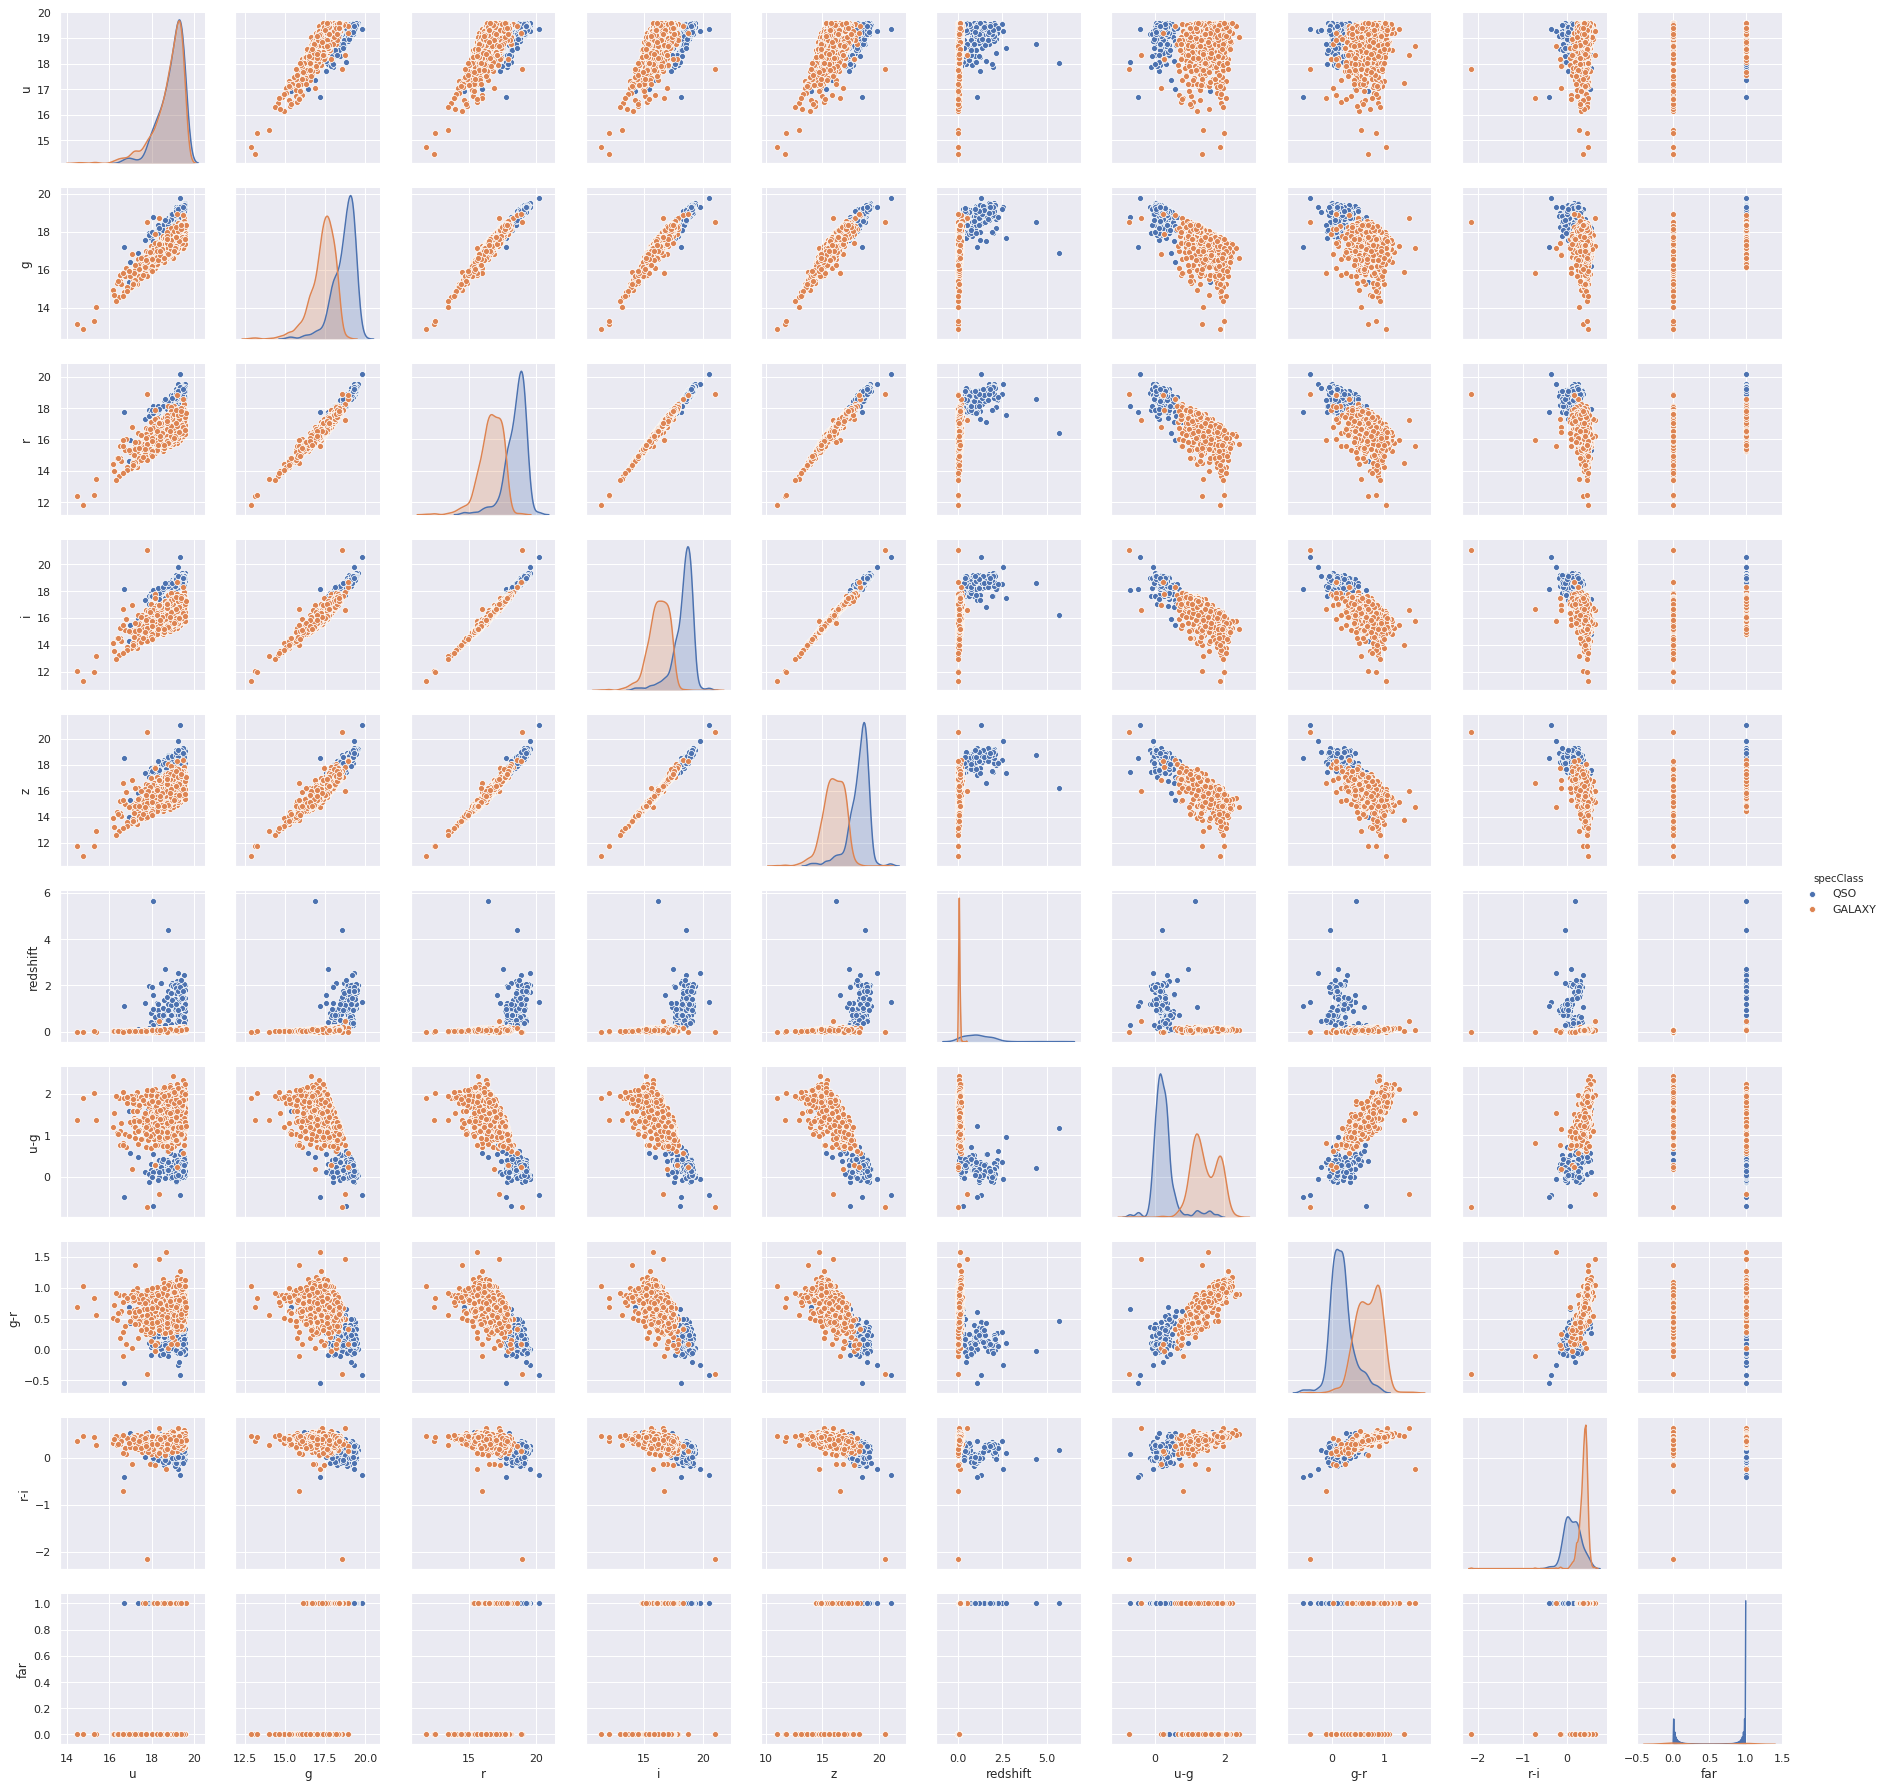

In [11]:
df = data.drop('redshift_err', axis=1)

sns.pairplot(data=df, hue="specClass");

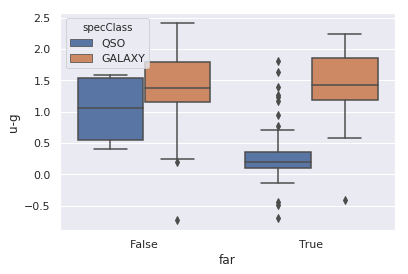

In [16]:
sns.boxplot(x="far", y="u-g",
            hue="specClass", 
            data=data);

For large numbers of data points, a jointplot will show a bivariate distribution with both univariate distributions. First exapmle as hexagon plot:

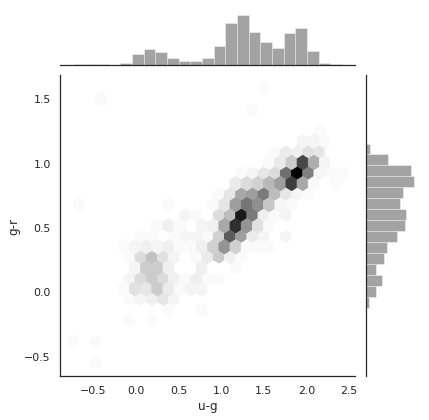

In [13]:
with sns.axes_style("white"):
    sns.jointplot(x='u-g', y="g-r", data=data, kind="hex", color="k");

Same data as kernel density estimation ("kde"):

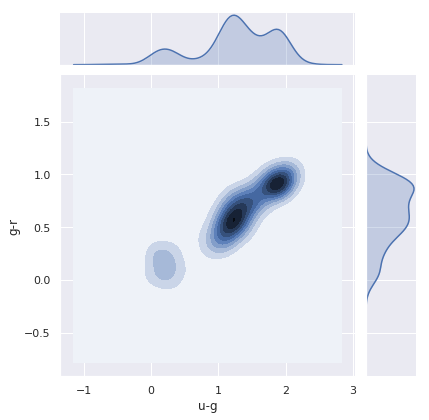

In [14]:
sns.jointplot(x='u-g', y="g-r", data=data, kind="kde");

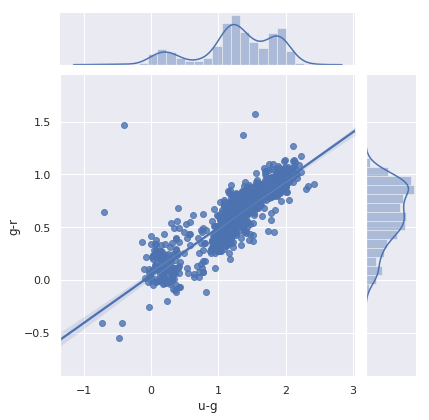

In [15]:
sns.jointplot(x='u-g', y="g-r", data=data, kind="reg");